<a href="https://colab.research.google.com/github/SicilianoBartolomeo/Ingegneria-della-Conoscenza/blob/main/carPricePrediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# IMPORT

In [ ]:
import pandas as pd
import numpy as np
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import power_transform
from sklearn.preprocessing import minmax_scale
from sklearn.model_selection import train_test_split
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import SGDRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_val_score as cvs
from sklearn.model_selection import GridSearchCV
import matplotlib.pyplot as plt
from prettytable import PrettyTable
import seaborn as sns

In [ ]:
import tensorflow as tf
tf.test.gpu_device_name()

'/device:GPU:0'

# **DATA INSPECTION E PREPROCESSING**

# FIRST DATASET

In [ ]:
#first dataset
df = pd.read_csv('CarPrice.csv')
df

,Brand & Model,Varient,Fuel Type,Driven Kilometers,Transmission,Owner,Location,Date of Posting Ad,Price (in ₹)
0,Mahindra Xuv500 (2013),W8 Dual Tone,DIESEL,"58,000 KM",MANUAL,1st Owner,"Pitampura, Delhi",01/27/2022,435000
1,Hyundai Creta (2020),1.6 SX Option Executive Diesel,DIESEL,43861.0 KM,MANUAL,1st Owner,"Ahiritola, Kolkata",01/23/2022,1165101
2,Hyundai Verna (2019),VTVT 1.4 EX,PETROL,"17,000 KM",MANUAL,2nd Owner,"Chelavoor, Pantheeramkavu",01/25/2022,815000
3,Datsun Redigo (2020),D,PETROL,10000 KM,MANUAL,1st Owner,"Palam, Delhi",01/13/2022,270000
4,Hyundai I10 (2011),Sportz 1.1 iRDE2,PETROL,70000 KM,MANUAL,1st Owner,"Dwarka Sector 13, Delhi",01/13/2022,185000
...,...,...,...,...,...,...,...,...,...
5045,maruti suzuki 800 (1970),EX 5 Speed,LPG,"500,000 Km",Automatic,1st Owner,Alipur,01/23/2022,50000
5046,renault duster (2012),2012-2015 110PS Diesel RxZ,Diesel,"111,000 Km",Manual,1st Owner,"MDDA Colony Near Kedarpuram, Dehradun",01/23/2022,320000
5047,hyundai santro (2021),Sportz AMT,Petrol,"5,500 Km",Automatic,1st Owner,"Pragati Nagar, Ahmedabad",01/23/2022,599000
5048,hyundai verna (2013),VTVT 1.6 EX,Petrol,61231.0 Km,Manual,1st Owner,"Malad West, Mumbai",01/27/2022,395000


In [ ]:
print("Dataset dimension (row, coloumn):")
df.shape

Dataset dimension (row, coloumn):


(5050, 9)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5050 entries, 0 to 5049
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Brand & Model       5050 non-null   object
 1   Varient             5011 non-null   object
 2   Fuel Type           5050 non-null   object
 3   Driven Kilometers   5050 non-null   object
 4   Transmission        5050 non-null   object
 5   Owner               5050 non-null   object
 6   Location            5050 non-null   object
 7   Date of Posting Ad  5050 non-null   object
 8   Price (in ₹)        5050 non-null   int64 
dtypes: int64(1), object(8)
memory usage: 355.2+ KB


In [ ]:
print(df.isnull().sum())
print("\nUna piccola percentuale dei valori Varient sono nulli")
print("devono essere trattati correttamente\n")

Brand & Model          0
Varient               39
Fuel Type              0
Driven Kilometers      0
Transmission           0
Owner                  0
Location               0
Date of Posting Ad     0
Price (in ₹)           0
dtype: int64

Una piccola percentuale dei valori Varient sono nulli
devono essere trattati correttamente



In [ ]:
imp=SimpleImputer(missing_values=np.nan,strategy='most_frequent')
df['Varient']=imp.fit_transform(df['Varient'].values.reshape(-1,1))
print("After handling nulls:")
print(df.isnull().sum())

After handling nulls:
Brand & Model         0
Varient               0
Fuel Type             0
Driven Kilometers     0
Transmission          0
Owner                 0
Location              0
Date of Posting Ad    0
Price (in ₹)          0
dtype: int64


In [ ]:
'''
#conversion from indian rupee to euro
conversion = []
for x in df['Price (in ₹)']:
    x = x * 0.0123747126436782
    conversion.append(x)
df['Price (in ₹)'] = conversion
'''

print("\nTransformation of data from object type to ordinal type:\n")
le = LabelEncoder()
for column in df.drop(['Price (in ₹)'],axis=1).columns:
    df[column]=le.fit_transform(df[column])
df


Transformation of data from object type to ordinal type:



,Brand & Model,Varient,Fuel Type,Driven Kilometers,Transmission,Owner,Location,Date of Posting Ad,Price (in ₹)
0,266,143,3,543,10,1,123,31,435000
1,243,22,3,419,10,1,2,28,1165101
2,255,130,6,159,10,2,33,30,815000
3,226,79,6,80,10,1,115,20,270000
4,246,121,6,656,10,1,42,20,185000
...,...,...,...,...,...,...,...,...,...
5045,358,87,5,484,6,1,6,28,50000
5046,375,56,4,97,12,1,81,28,320000
5047,351,122,7,472,6,1,126,28,599000
5048,353,131,7,586,12,1,87,31,395000


In [ ]:
#split 1st dataset
x1= df.drop(['Price (in ₹)'],axis=1)
y1=df['Price (in ₹)']

x1=power_transform(x1,method='yeo-johnson')
scale = StandardScaler()
x1=scale.fit_transform(x1)

x1train, x1test, y1train, y1test = train_test_split(x1, y1, test_size = 0.3, random_state = 45)

# SECOND DATASET

**Load 2nd dataset from kaggle**

In [ ]:
! pip install kaggle
! mkdir ~/.kaggle
! cp kaggle.json ~/.kaggle/
! chmod 600 ~/.kaggle/kaggle.json

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
! kaggle datasets download austinreese/craigslist-carstrucks-data -f vehicles.csv
! unzip vehicles.csv.zip

 98% 257M/262M [00:07<00:00, 35.9MB/s]
100% 262M/262M [00:07<00:00, 35.6MB/s]
Archive:  vehicles.csv.zip
  inflating: vehicles.csv            


In [ ]:
#second dataset
df = pd.read_csv('vehicles.csv')
df

,id,url,region,region_url,price,year,manufacturer,model,condition,cylinders,...,size,type,paint_color,image_url,description,county,state,lat,long,posting_date
0,7222695916,https://prescott.craigslist.org/cto/d/prescott...,prescott,https://prescott.craigslist.org,6000,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,az,NaN,NaN,NaN
1,7218891961,https://fayar.craigslist.org/ctd/d/bentonville...,fayetteville,https://fayar.craigslist.org,11900,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,ar,NaN,NaN,NaN
2,7221797935,https://keys.craigslist.org/cto/d/summerland-k...,florida keys,https://keys.craigslist.org,21000,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,fl,NaN,NaN,NaN
3,7222270760,https://worcester.craigslist.org/cto/d/west-br...,worcester / central MA,https://worcester.craigslist.org,1500,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,ma,NaN,NaN,NaN
4,7210384030,https://greensboro.craigslist.org/cto/d/trinit...,greensboro,https://greensboro.craigslist.org,4900,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,nc,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
426875,7301591192,https://wyoming.craigslist.org/ctd/d/atlanta-2...,wyoming,https://wyoming.craigslist.org,23590,2019.0,nissan,maxima s sedan 4d,good,6 cylinders,...,NaN,sedan,NaN,https://images.craigslist.org/00o0o_iiraFnHg8q...,Carvana is the safer way to buy a car During t...,NaN,wy,33.786500,-84.445400,2021-04-04T03:21:31-0600
426876,7301591187,https://wyoming.craigslist.org/ctd/d/atlanta-2...,wyoming,https://wyoming.craigslist.org,30590,2020.0,volvo,s60 t5 momentum sedan 4d,good,NaN,...,NaN,sedan,red,https://images.craigslist.org/00x0x_15sbgnxCIS...,Carvana is the safer way to buy a car During t...,NaN,wy,33.786500,-84.445400,2021-04-04T03:21:29-0600
426877,7301591147,https://wyoming.craigslist.org/ctd/d/atlanta-2...,wyoming,https://wyoming.craigslist.org,34990,2020.0,cadillac,xt4 sport suv 4d,good,NaN,...,NaN,hatchback,white,https://images.craigslist.org/00L0L_farM7bxnxR...,Carvana is the safer way to buy a car During t...,NaN,wy,33.779214,-84.411811,2021-04-04T03:21:17-0600
426878,7301591140,https://wyoming.craigslist.org/ctd/d/atlanta-2...,wyoming,https://wyoming.craigslist.org,28990,2018.0,lexus,es 350 sedan 4d,good,6 cylinders,...,NaN,sedan,silver,https://images.craigslist.org/00z0z_bKnIVGLkDT...,Carvana is the safer way to buy a car During t...,NaN,wy,33.786500,-84.445400,2021-04-04T03:21:11-0600


In [ ]:
print("Dataset dimension (row, coloumn):")
print(df.shape)

Dataset dimension (row, coloumn):
(426880, 26)


In [ ]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 426880 entries, 0 to 426879
Data columns (total 26 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   id            426880 non-null  int64  
 1   url           426880 non-null  object 
 2   region        426880 non-null  object 
 3   region_url    426880 non-null  object 
 4   price         426880 non-null  int64  
 5   year          425675 non-null  float64
 6   manufacturer  409234 non-null  object 
 7   model         421603 non-null  object 
 8   condition     252776 non-null  object 
 9   cylinders     249202 non-null  object 
 10  fuel          423867 non-null  object 
 11  odometer      422480 non-null  float64
 12  title_status  418638 non-null  object 
 13  transmission  424324 non-null  object 
 14  VIN           265838 non-null  object 
 15  drive         296313 non-null  object 
 16  size          120519 non-null  object 
 17  type          334022 non-null  object 
 18  pain

In [ ]:
# the features which are too common or of no use like url can be dropped
df= df.drop(columns=['id','url', 'region_url', 'VIN', 'image_url',
                     'description', 'lat', 'long','county','region','posting_date'], axis=1)

In [ ]:
df.head()

,price,year,manufacturer,model,condition,cylinders,fuel,odometer,title_status,transmission,drive,size,type,paint_color,state
0,6000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,az
1,11900,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ar
2,21000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,fl
3,1500,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ma
4,4900,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,nc


In [ ]:
df.describe()

,price,year,odometer
count,4.268800e+05,425675.000000,4.224800e+05
mean,7.519903e+04,2011.235191,9.804333e+04
std,1.218228e+07,9.452120,2.138815e+05
min,0.000000e+00,1900.000000,0.000000e+00
25%,5.900000e+03,2008.000000,3.770400e+04
50%,1.395000e+04,2013.000000,8.554800e+04
75%,2.648575e+04,2017.000000,1.335425e+05
max,3.736929e+09,2022.000000,1.000000e+07


**Handling outliers**

Lets see if any outliers in Target variable as we remove them the model can be more accurate
because they cause a bring a lot of difference in values of mean.

The difference between 75% value and max value is too large so lets leave 10% values at both ends of a distribution

In [ ]:
rr=sorted(df["price"])
quantile1, quantile3= np.percentile(rr,[10,90])
print(quantile1,quantile3)

500.0 37590.0


In [ ]:
df=df[(df.price < 37590) & (df.price >= 500 )]
print(df.shape)

(341976, 15)


Lets observe the odometer column

In [ ]:
df["odometer"].isna().sum()

1889

In [ ]:
print(df["odometer"].max())

10000000.0


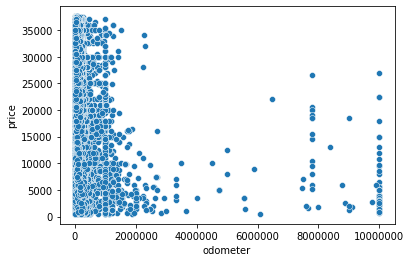

In [ ]:
df.drop(df[df["odometer"]==10000000.0].index,inplace=True)  ######
df.drop(df[df["odometer"]==0.0].index,inplace=True)
ax = sns.scatterplot(x="odometer", y="price", data=df)
ax.get_xaxis().get_major_formatter().set_scientific(False)
ax.get_yaxis().get_major_formatter().set_scientific(False)

here the values above 3000000 can be considered as outliers

In [ ]:
df=df[(df.odometer < 3000000)]
df["odometer"].isna().sum()

0

Lets observe the year column

In [ ]:
df["year"].isna().sum()

564

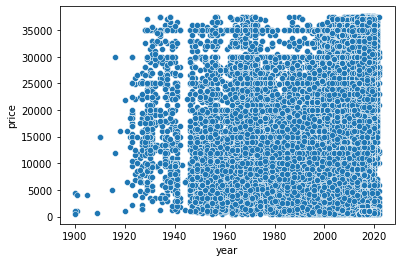

In [ ]:
bx = sns.scatterplot(x="year", y="price", data=df)

In [ ]:
#the null values in a year column cannot be replaced so lets eliminate them
df.drop(df[df["year"]==0.0].index,inplace=True)
df=df.dropna(subset=['year'])
df=df[(df.year > 1940)]

Handling null values

In [ ]:
df=df.dropna(subset=['title_status','fuel','transmission','model','manufacturer'])
df=df.drop(["size"],axis=1)
df['paint_color'] = df['paint_color'].fillna(method='ffill')
df['drive'] = df['drive'].fillna(method='ffill')
df['type'] = df['type'].fillna(method='ffill')
df['cylinders'] = df['cylinders'].fillna(method='ffill')
df=df.dropna(subset=['condition','drive'])
print(df.isnull().sum())

price           0
year            0
manufacturer    0
model           0
condition       0
cylinders       0
fuel            0
odometer        0
title_status    0
transmission    0
drive           0
type            0
paint_color     0
state           0
dtype: int64


In [ ]:
#Transformation of data from object type to ordinal type
le = LabelEncoder()
df[['manufacturer', 'model', 'condition',
'cylinders', 'fuel', 'title_status', 'transmission',
'drive', 'type', 'paint_color', 'state']]=df[['manufacturer', 'model', 'condition',
'cylinders', 'fuel', 'title_status', 'transmission',
'drive', 'type', 'paint_color', 'state']].apply(le.fit_transform)

df

,price,year,manufacturer,model,condition,cylinders,fuel,odometer,title_status,transmission,drive,type,paint_color,state
31,15000,2013.0,13,5808,0,5,2,128000.0,0,0,2,10,0,1
32,27990,2012.0,14,11332,2,6,2,68696.0,0,2,0,8,0,1
33,34590,2016.0,7,11459,2,5,2,29499.0,0,2,0,8,9,1
34,35000,2019.0,38,12245,0,5,2,43000.0,0,0,0,10,5,1
35,29990,2016.0,7,3728,2,5,2,17302.0,0,2,0,8,8,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
426875,23590,2019.0,30,8672,2,5,2,32226.0,0,2,1,9,10,50
426876,30590,2020.0,40,10884,2,5,2,12029.0,0,2,1,9,8,50
426877,34990,2020.0,6,13941,2,5,0,4174.0,0,2,1,4,10,50
426878,28990,2018.0,23,5288,2,5,2,30112.0,0,2,1,9,9,50


In [ ]:
y2= df['price']
x2= df.drop(['price'],axis=1)
x2train, x2test, y2train, y2test = train_test_split(x2, y2, test_size = 0.3, random_state = 45)

# **MODELS' ANALISYS**

# MODELS' FUNCTION

In [ ]:
def SVR_model(xtrain,xtest,ytrain, ytest):
  svr = SVR(cache_size=7000)
  svr.fit(xtrain,ytrain)
  pred_train_svr=svr.predict(xtrain)
  pred_test_svr=svr.predict(xtest)
  svrScore=svr.score(xtrain,ytrain)
  svrR2Score=r2_score(ytest,pred_test_svr)
  svrMAE=mean_absolute_error(ytest,pred_test_svr)
  svrMSE=mean_squared_error(ytest,pred_test_svr)
  svrRMSE=np.sqrt(svrMSE)
  print('SVR Regressor Score:',svrScore)
  print('SVR Regressor r2_score:',svrR2Score)
  print("Mean absolute error of SVR Regressor:",svrMAE)
  print("Mean squared error of SVR Regressor:",svrMSE)
  print("Root Mean Square error of SVR Regressor:",svrRMSE)
  plt.scatter(ytest, pred_test_svr)
  plt.xlabel("Actual Price")
  plt.ylabel("Predicted Price")
  plt.title(" Actual Prices vs Predicted Prices")
  plt.show()
  return svr, pred_test_svr

def LinearRegressionModel(xtrain, xtest,ytrain, ytest):
  lr= LinearRegression()
  lr.fit(xtrain,ytrain)
  lr.coef_
  pred_train=lr.predict(xtrain)
  pred_test=lr.predict(xtest)
  print('\n\nLinear Regression Score:',lr.score(xtrain,ytrain))
  print('Linear Regression r2_score:',r2_score(ytest,pred_test))
  print("Mean absolute error of Linear Regressor:",mean_absolute_error(ytest,pred_test))
  print("Mean squared error of Linear Regression:",mean_squared_error(ytest,pred_test))
  print("Root Mean Square error of Linear Regression:",np.sqrt(mean_squared_error(ytest,pred_test)))
  plt.scatter(ytest, pred_test)
  plt.xlabel("Actual Price")
  plt.ylabel("Predicted Price")
  plt.title(" Actual Prices vs Predicted Prices --- Linear regression")
  plt.show()
  return lr, pred_test

def KNR_model(xtrain, xtest,ytrain, ytest):
 knr = KNeighborsRegressor()
 knr.fit(xtrain,ytrain)
 pred_train_knr=knr.predict(xtrain)
 pred_test_knr=knr.predict(xtest)
 print('\n\nK Neighbors Regressor Score:',knr.score(xtrain,ytrain))
 print('K Neighbors Regressor r2_score:',r2_score(ytest,pred_test_knr))
 print("Mean absolute error of K Neighbors Regressorr:",mean_absolute_error(ytest,pred_test_knr))
 print("Mean squared error of K Neighbors Regressor:",mean_squared_error(ytest,pred_test_knr))
 print("Root Mean Square error of K Neighbors Regressor:",np.sqrt(mean_squared_error(ytest,pred_test_knr)))
 plt.scatter(ytest, pred_test_knr)
 plt.xlabel("Actual Price")
 plt.ylabel("Predicted Price")
 plt.title(" Actual Prices vs Predicted Prices --- KNR")
 plt.show()
 return knr, pred_test_knr

def SGDR_model(xtrain, xtest,ytrain, ytest):
 sgd=SGDRegressor()
 sgd.fit(xtrain,ytrain)
 pred_train_sgd=sgd.predict(xtrain)
 pred_test_sgd=sgd.predict(xtest)
 print('\n\nSGD Regressor Score:',sgd.score(xtrain,ytrain))
 print('SGD Regressor r2_score:',r2_score(ytest,pred_test_sgd))
 print("Mean absolute error of SGD Regressor:",mean_absolute_error(ytest,pred_test_sgd))
 print("Mean squared error of SGD Regressor:",mean_squared_error(ytest,pred_test_sgd))
 print("Root Mean Square error of SGD Regressor:",np.sqrt(mean_squared_error(ytest,pred_test_sgd)))
 plt.scatter(ytest, pred_test_sgd)
 plt.xlabel("Actual Price")
 plt.ylabel("Predicted Price")
 plt.title(" Actual Prices vs Predicted Prices --- SGD Regression")
 plt.show()
 return sgd, pred_test_sgd

def DTR_model(xtrain, xtest, ytrain, ytest):
 dtr=DecisionTreeRegressor(criterion='squared_error')
 dtr.fit(xtrain,ytrain)
 pred_train_dtr=dtr.predict(xtrain)
 pred_test_dtr=dtr.predict(xtest)
 print('\n\nDecision Tree Regressor Score:',dtr.score(xtrain,ytrain))
 print('Decision Tree Regressor r2_score:',r2_score(ytest,pred_test_dtr))
 print("Mean absolute error of Decision Tree Regressor:",mean_absolute_error(ytest,pred_test_dtr))
 print("Mean squared error of Decision Tree Regressor:",mean_squared_error(ytest,pred_test_dtr))
 print("Root Mean Square error of Decision Tree Regressor:",np.sqrt(mean_squared_error(ytest,pred_test_dtr)))
 plt.scatter(ytest, pred_test_dtr)
 plt.xlabel("Actual Price")
 plt.ylabel("Predicted Price")
 plt.title(" Actual Prices vs Predicted Prices --- Decision tree regressor")
 plt.show()
 return dtr, pred_test_dtr

def RFR_model(xtrain, xtest, ytrain, ytest):
 rf=RandomForestRegressor()
 rf.fit(xtrain,ytrain)
 pred_train_rf=rf.predict(xtrain)
 pred_test_rf=rf.predict(xtest)
 print('\n\nRandom Forest Regressor Score:',rf.score(xtrain,ytrain))
 print('Random Forest Regressor r2_score:',r2_score(ytest,pred_test_rf))
 print("Mean absolute error of Random Forest Regressor:",mean_absolute_error(ytest,pred_test_rf))
 print("Mean squared error of Random Forest Regressor:",mean_squared_error(ytest,pred_test_rf))
 print("Root Mean Square error of Random Forest Regressor:",np.sqrt(mean_squared_error(ytest,pred_test_rf)))
 plt.scatter(ytest, pred_test_rf)
 plt.xlabel("Actual Price")
 plt.ylabel("Predicted Price")
 plt.title(" Actual Prices vs Predicted Prices --- Random forest")
 plt.show()
 return rf, pred_test_rf

def ANN_model(xtrain, xtest, ytrain, ytest):
 from keras.models import Sequential
 from keras.layers import Dense
 
 # create ANN model
 model = Sequential()
 
 # Defining the Input layer and FIRST hidden layer, both are same!
 model.add(Dense(units=5, input_dim=13, kernel_initializer='normal', activation='relu'))
 
 # Defining the Second layer of the model
 # after the first layer we don't have to specify input_dim as keras configure it automatically
 model.add(Dense(units=5, kernel_initializer='normal', activation='tanh'))
 
 # The output neuron is a single fully connected node 
 # Since we will be predicting a single number
 model.add(Dense(1, kernel_initializer='normal'))
 
 # Compiling the model
 model.compile(loss='mean_squared_error', optimizer='adam')
 
 # Fitting the ANN to the Training set
 model.fit(xtrain, ytrain ,batch_size = 20, epochs = 50, verbose=1)

 pred_train_ann=model.predict(xtrain)
 pred_test_ann=model.predict(xtest)
 print('\n\nNeural Networck Score:',model.evaluate(xtrain,ytrain))
 print('Neural Networck r2_score:',r2_score(ytest,pred_test_ann))
 print("Mean absolute error of Neural Networck:",mean_absolute_error(ytest,pred_test_ann))
 print("Mean squared error of Neural Networck:",mean_squared_error(ytest,pred_test_ann))
 print("Root Mean Square error of Neural Networck:",np.sqrt(mean_squared_error(ytest,pred_test_ann)))
 plt.scatter(ytest, pred_test_ann)
 plt.xlabel("Actual Price")
 plt.ylabel("Predicted Price")
 plt.title(" Actual Prices vs Predicted Prices --- Neural Network")
 plt.show()
 return model, pred_test_ann

In [ ]:
def compareScoreModel(xtrain,ytrain,ytest,svr,pred_test_svr,lr,pred_test,sgd,pred_test_sgd,knr,pred_test_knr
                      ,dtr,pred_test_dtr, rf, pred_test_rf):
 compareModel = PrettyTable()
 compareModel.field_names = ["Model", "R2 score on training set", "R2 score on test set", 
 "Mean absolute error", "Mean squared error", "Root mean squared error"]
 compareModel.add_row(["SVR", "{:.3f}".format(svr.score(xtrain,ytrain)), "{:.3f}".format(r2_score(ytest,pred_test_svr)),
 "{:.3f}".format(mean_absolute_error(ytest,pred_test_svr)), "{:.3f}".format(mean_squared_error(ytest,pred_test_svr)),
 "{:.3f}".format(np.sqrt(mean_squared_error(ytest,pred_test_svr)))])

 compareModel.add_row(["Linear Regression", "{:.3f}".format(lr.score(xtrain,ytrain)), "{:.3f}".format(r2_score(ytest,pred_test)),
 "{:.3f}".format(mean_absolute_error(ytest,pred_test)), "{:.3f}".format(mean_squared_error(ytest,pred_test)),
 "{:.3f}".format(np.sqrt(mean_squared_error(ytest,pred_test)))])

 compareModel.add_row(["SGD Regressor", "{:.3f}".format(sgd.score(xtrain,ytrain)),"{:.3f}".format(r2_score(ytest,pred_test_sgd)),
 "{:.3f}".format(mean_absolute_error(ytest,pred_test_sgd)),"{:.3f}".format(mean_squared_error(ytest,pred_test_sgd)),
 "{:.3f}".format(np.sqrt(mean_squared_error(ytest,pred_test_sgd)))])

 compareModel.add_row(["K Neighbors Regressor", "{:.3f}".format(knr.score(xtrain,ytrain)),"{:.3f}".format(r2_score(ytest,pred_test_knr)),
 "{:.3f}".format(mean_absolute_error(ytest,pred_test_knr)),"{:.3f}".format(mean_squared_error(ytest,pred_test_knr)),
 "{:.3f}".format(np.sqrt(mean_squared_error(ytest,pred_test_knr)))])

 compareModel.add_row(["Decision Tree Regressor", "{:.3f}".format(dtr.score(xtrain,ytrain)),"{:.3f}".format(r2_score(ytest,pred_test_dtr)),
 "{:.3f}".format(mean_absolute_error(ytest,pred_test_dtr)),"{:.3f}".format(mean_squared_error(ytest,pred_test_dtr)),
 "{:.3f}".format(np.sqrt(mean_squared_error(ytest,pred_test_dtr)))])

 compareModel.add_row(["Random Forest Regressor", "{:.3f}".format(rf.score(xtrain,ytrain)),"{:.3f}".format(r2_score(ytest,pred_test_rf)),
 "{:.3f}".format(mean_absolute_error(ytest,pred_test_rf)),"{:.3f}".format(mean_squared_error(ytest,pred_test_rf)),
 "{:.3f}".format(np.sqrt(mean_squared_error(ytest,pred_test_rf)))])
 return compareModel

def compareScoreModel2(xtrain,ytrain,ytest,lr,pred_test,sgd,pred_test_sgd,knr,pred_test_knr
                      ,dtr,pred_test_dtr, rf, pred_test_rf):
 compareModel = PrettyTable()
 compareModel.field_names = ["Model", "R2 score on training set", "R2 score on test set", 
 "Mean absolute error", "Mean squared error", "Root mean squared error"]

 compareModel.add_row(["Linear Regression", "{:.3f}".format(lr.score(xtrain,ytrain)), "{:.3f}".format(r2_score(ytest,pred_test)),
 "{:.3f}".format(mean_absolute_error(ytest,pred_test)), "{:.3f}".format(mean_squared_error(ytest,pred_test)),
 "{:.3f}".format(np.sqrt(mean_squared_error(ytest,pred_test)))])

 compareModel.add_row(["SGD Regressor", "{:.3f}".format(sgd.score(xtrain,ytrain)),"{:.3f}".format(r2_score(ytest,pred_test_sgd)),
 "{:.3f}".format(mean_absolute_error(ytest,pred_test_sgd)),"{:.3f}".format(mean_squared_error(ytest,pred_test_sgd)),
 "{:.3f}".format(np.sqrt(mean_squared_error(ytest,pred_test_sgd)))])

 compareModel.add_row(["K Neighbors Regressor", "{:.3f}".format(knr.score(xtrain,ytrain)),"{:.3f}".format(r2_score(ytest,pred_test_knr)),
 "{:.3f}".format(mean_absolute_error(ytest,pred_test_knr)),"{:.3f}".format(mean_squared_error(ytest,pred_test_knr)),
 "{:.3f}".format(np.sqrt(mean_squared_error(ytest,pred_test_knr)))])

 compareModel.add_row(["Decision Tree Regressor", "{:.3f}".format(dtr.score(xtrain,ytrain)),"{:.3f}".format(r2_score(ytest,pred_test_dtr)),
 "{:.3f}".format(mean_absolute_error(ytest,pred_test_dtr)),"{:.3f}".format(mean_squared_error(ytest,pred_test_dtr)),
 "{:.3f}".format(np.sqrt(mean_squared_error(ytest,pred_test_dtr)))])

 compareModel.add_row(["Random Forest Regressor", "{:.3f}".format(rf.score(xtrain,ytrain)),"{:.3f}".format(r2_score(ytest,pred_test_rf)),
 "{:.3f}".format(mean_absolute_error(ytest,pred_test_rf)),"{:.3f}".format(mean_squared_error(ytest,pred_test_rf)),
 "{:.3f}".format(np.sqrt(mean_squared_error(ytest,pred_test_rf)))])
 return compareModel

def compareModelOnDataSet(title, y1test, y2test, pred_test_model1, pred_test_model2):
 compareModel = PrettyTable()
 compareModel.field_names = ["Model", "R2 score on test set", 
 "Mean absolute error", "Mean squared error", "Root mean squared error"]
 compareModel.add_row([title[0], "{:.3f}".format(r2_score(y1test,pred_test_model1)),
 "{:.3f}".format(mean_absolute_error(y1test,pred_test_model1)), "{:.3f}".format(mean_squared_error(y1test,pred_test_model1)),
 "{:.3f}".format(np.sqrt(mean_squared_error(y1test,pred_test_model1)))])
 compareModel.add_row([title[1], "{:.3f}".format(r2_score(y2test,pred_test_model2)),
 "{:.3f}".format(mean_absolute_error(y2test,pred_test_model2)), "{:.3f}".format(mean_squared_error(y2test,pred_test_model2)),
 "{:.3f}".format(np.sqrt(mean_squared_error(y2test,pred_test_model2)))])
 return compareModel


In [ ]:
#K FOLD CROSS VALIDATION
def crossValidation(x, y, svr, lr, sgd, knr, dtr, rf):
 compareCrossValidation = PrettyTable()
 compareCrossValidation.field_names = ["Model", "Cross Validation Score"]
 compareCrossValidation.add_row(["SVR", "{:.3f}".format((cvs(svr,x,y,cv=5).mean())*100)])
 compareCrossValidation.add_row(["Linear Regression", "{:.3f}".format((cvs(lr,x,y,cv=5).mean())*100)])
 compareCrossValidation.add_row(["SGD Regressor", "{:.3f}".format((cvs(sgd,x,y,cv=5).mean())*100)])
 compareCrossValidation.add_row(["K Neighbors Regressor", "{:.3f}".format((cvs(knr,x,y,cv=5).mean())*100)])
 compareCrossValidation.add_row(["Decision Tree Regressor", "{:.3f}".format((cvs(dtr,x,y,cv=5).mean())*100)])
 compareCrossValidation.add_row(["Random Forest Regressor", "{:.3f}".format((cvs(rf,x,y,cv=5).mean())*100)])
 return compareCrossValidation

In [ ]:
#HYPERPARAMETER TUNING
def hpTuningRf(xtrain, ytrain):
 print("\nHyper parameter tuning:")
 parameter = { 'bootstrap': [True, False],
  'max_features': ['sqrt', 'log2'],
  'min_samples_leaf': [1, 2, 4],
  'min_samples_split': [2, 5, 10],}

 gvc = GridSearchCV(RandomForestRegressor(),parameter,cv=5)
 gvc.fit(xtrain,ytrain)
 print("Best parameter for Random Forest Regressor:\n")
 print(gvc.best_params_)

def hpTunintSvm(xtrain,ytrain):
 param = {'kernel' : ('linear', 'poly', 'rbf', 'sigmoid'),
 'C' : [1,5,10],
 'degree' : [3,8],
 'coef0' : [0.01,10,0.5],
 'gamma' : ('auto','scale')}

 grids = GridSearchCV(SVR(),param,cv = 3,n_jobs = -1, verbose = 2)
 grids.fit(xtrain,ytrain)
 print("Best parameter for Support Vector Regressor:\n")
 print(grids.best_params_)

# MODELS TRAIN

Models trained on first dataSet

SVR Regressor Score: -0.06325370730174851
SVR Regressor r2_score: -0.06820672247987791
Mean absolute error of SVR Regressor: 271198.4321420298
Mean squared error of SVR Regressor: 297284446193.9865
Root Mean Square error of SVR Regressor: 545237.9720764012


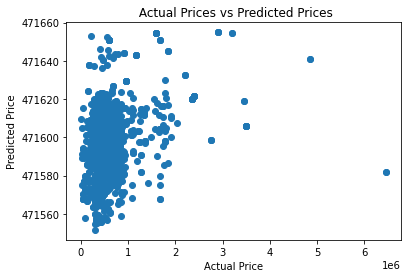



Linear Regression Score: 0.055020586349048384
Linear Regression r2_score: 0.061364713139148486
Mean absolute error of Linear Regressor: 297255.7327343899
Mean squared error of Linear Regression: 261224410556.7481
Root Mean Square error of Linear Regression: 511101.1744818712


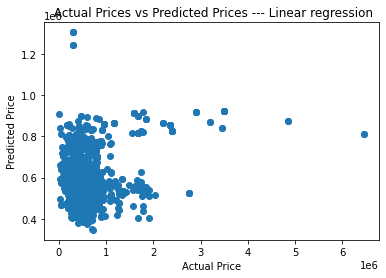



K Neighbors Regressor Score: 0.748169225500505
K Neighbors Regressor r2_score: 0.6045261241639399
Mean absolute error of K Neighbors Regressorr: 198276.38798679868
Mean squared error of K Neighbors Regressor: 110061310875.45856
Root Mean Square error of K Neighbors Regressor: 331754.89578220027


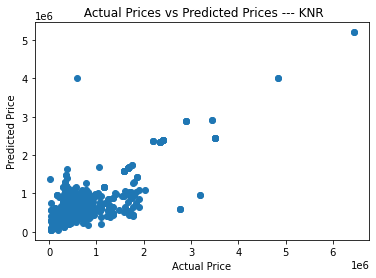



SGD Regressor Score: 0.054434392335061976
SGD Regressor r2_score: 0.06088100468637836
Mean absolute error of SGD Regressor: 295957.34014847013
Mean squared error of SGD Regressor: 261359027758.15207
Root Mean Square error of SGD Regressor: 511232.85082059435


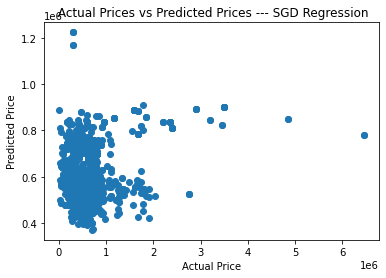



Decision Tree Regressor Score: 0.9979397374843745
Decision Tree Regressor r2_score: 0.8086857263248622
Mean absolute error of Decision Tree Regressor: 77560.42772277228
Mean squared error of Decision Tree Regressor: 53243212855.355774
Root Mean Square error of Decision Tree Regressor: 230744.90862282482


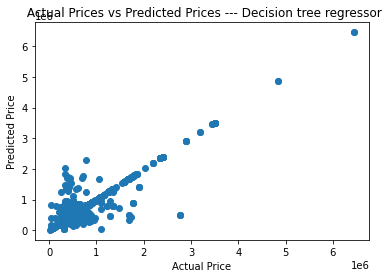



Random Forest Regressor Score: 0.9823087709446942
Random Forest Regressor r2_score: 0.8834464800438157
Mean absolute error of Random Forest Regressor: 87240.37396551085
Mean squared error of Random Forest Regressor: 32437119054.721844
Root Mean Square error of Random Forest Regressor: 180103.0789706879


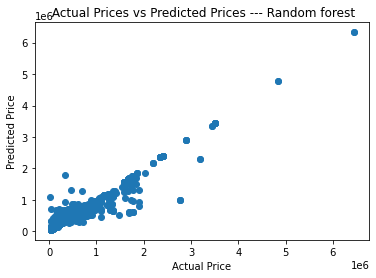

In [ ]:
#Models trained on 1st dataset
print("Models trained on first dataSet\n")
svr1, predSvr1 = SVR_model(x1train,x1test, y1train, y1test)
lr1, predLr1 = LinearRegressionModel(x1train, x1test,y1train, y1test)
knr1, predKnr1 = KNR_model(x1train,x1test, y1train, y1test)
sgd1, predSgd1 = SGDR_model(x1train,x1test, y1train, y1test)
dtr1, predDtr1 = DTR_model(x1train,x1test, y1train, y1test)
rf1, predRf1 = RFR_model(x1train,x1test, y1train, y1test)

Models trained on second dataSet


Linear Regression Score: 0.5254535170139525
Linear Regression r2_score: 0.5234859854486539
Mean absolute error of Linear Regressor: 5388.143721885424
Mean squared error of Linear Regression: 49342469.12361189
Root Mean Square error of Linear Regression: 7024.419486591892


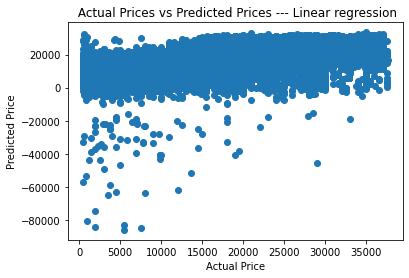



K Neighbors Regressor Score: 0.8098253059053128
K Neighbors Regressor r2_score: 0.6997127822601594
Mean absolute error of K Neighbors Regressorr: 3499.6630375358363
Mean squared error of K Neighbors Regressor: 31094390.337069143
Root Mean Square error of K Neighbors Regressor: 5576.234422714771


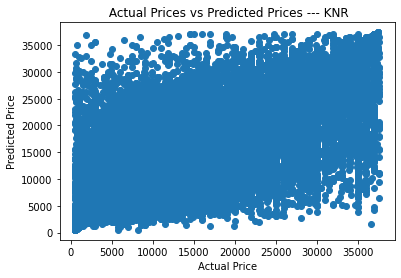



SGD Regressor Score: -2.9445846753846723e+28
SGD Regressor r2_score: -2.9539789517494166e+28
Mean absolute error of SGD Regressor: 1.331913386973545e+18
Mean squared error of SGD Regressor: 3.0588106701484894e+36
Root Mean Square error of SGD Regressor: 1.7489455881040123e+18


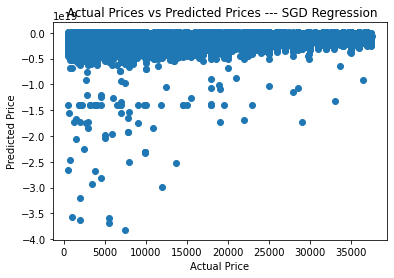



Decision Tree Regressor Score: 0.9999443872449817
Decision Tree Regressor r2_score: 0.8062154344826087
Mean absolute error of Decision Tree Regressor: 2281.482506342775
Mean squared error of Decision Tree Regressor: 20066165.2095945
Root Mean Square error of Decision Tree Regressor: 4479.527342208607


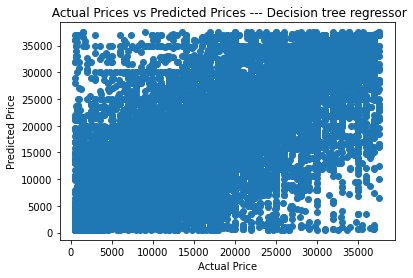



Random Forest Regressor Score: 0.9861138035946124
Random Forest Regressor r2_score: 0.8993195405315675
Mean absolute error of Random Forest Regressor: 1792.3294270435952
Mean squared error of Random Forest Regressor: 10425343.87440747
Root Mean Square error of Random Forest Regressor: 3228.8301092512547


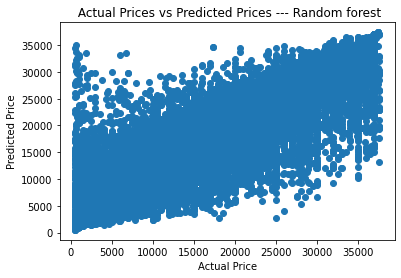

In [ ]:
#Models trained on 2nd dataset
print("Models trained on second dataSet")

lr2, predLr2 = LinearRegressionModel(x2train, x2test,y2train, y2test)
knr2, predKnr2 = KNR_model(x2train,x2test, y2train, y2test)
sgd2, predSgd2 = SGDR_model(x2train,x2test, y2train, y2test)
dtr2, predDtr2 = DTR_model(x2train,x2test, y2train, y2test)
rf2, predRf2 = RFR_model(x2train,x2test, y2train, y2test)


In [ ]:
# svr2, predSvr2 = SVR_model(x2train,x2test, y2train, y2test)

# MODELS' EVALUATION

**Compare models**

In [ ]:
#svrTitle = ["SVR trained on 1st dataset", "SVR trained on 2nd dataset"]
#compareModelOnDataSet(svrTitle, y1test, y2test, predSvr1, predSvr2)

In [ ]:
print("Models' scores trained on 1st dataset:")
print(compareScoreModel(x1train,y1train, y1test, svr1, predSvr1,lr1, predLr1,sgd1, predSgd1,knr1, predKnr1,
                  dtr1, predDtr1,rf1, predRf1))
print("\nModels' scores trained on 2nd dataset:")  
print(compareScoreModel2(x2train,y2train, y2test, lr2, predLr2,sgd2, predSgd2,knr2, predKnr2,
                  dtr2, predDtr2,rf2, predRf2))

print("\n\nCompare models trained on 1st dataset with models trained on 2nd dataset:")

lrTitle = ["Linear regression trained on 1st dataset", "Linear regression trained on 2nd dataset"]
print(compareModelOnDataSet(lrTitle, y1test, y2test, predLr1, predLr2))

sgdTitle = ["SGD regressor trained on 1st dataset", "SGD regressor trained on 2nd dataset"]
print(compareModelOnDataSet(sgdTitle, y1test, y2test, predSgd1, predSgd2))

knrTitle = ["KNR trained on 1st dataset", "KNR trained on 2nd dataset"]
print(compareModelOnDataSet(knrTitle, y1test, y2test, predKnr1, predKnr2))

dtrTitle = ["Decision tree trained on 1st dataset", "Decision tree trained on 2nd dataset"]
print(compareModelOnDataSet(dtrTitle, y1test, y2test, predDtr1, predDtr2))

rfrTitle = ["Random forest trained on 1st dataset", "Random forest trained on 2nd dataset"]
print(compareModelOnDataSet(rfrTitle, y1test, y2test, predRf1, predRf2))

Models' scores trained on 1st dataset:
+-------------------------+--------------------------+----------------------+---------------------+--------------------+-------------------------+
|          Model          | R2 score on training set | R2 score on test set | Mean absolute error | Mean squared error | Root mean squared error |
+-------------------------+--------------------------+----------------------+---------------------+--------------------+-------------------------+
|           SVR           |          -0.063          |        -0.068        |      271198.432     |  297284446193.987  |        545237.972       |
|    Linear Regression    |          0.055           |        0.061         |      297255.733     |  261224410556.748  |        511101.174       |
|      SGD Regressor      |          0.054           |        0.061         |      295957.340     |  261359027758.152  |        511232.851       |
|  K Neighbors Regressor  |          0.748           |        0.605         |  

**Cross validation on 1st dataset**

In [ ]:
print(crossValidation(x1, y1, svr1, lr1, sgd1, knr1, dtr1, rf1))

+-------------------------+------------------------+
|          Model          | Cross Validation Score |
+-------------------------+------------------------+
|           SVR           |         -6.938         |
|    Linear Regression    |         -3.980         |
|      SGD Regressor      |         -3.898         |
|  K Neighbors Regressor  |         41.907         |
| Decision Tree Regressor |         69.704         |
| Random Forest Regressor |         78.143         |
+-------------------------+------------------------+


**Hyperparameter tuning on 1st dataset**

In [ ]:
#random forest regressor hyperparameter tuning on 1st dataset
hpTuningRf(x1train, y1train)


Hyper parameter tuning:
Best parameter for Random Forest Regressor:

{'bootstrap': False, 'max_features': 'log2', 'min_samples_leaf': 1, 'min_samples_split': 2}


In [ ]:
# se lo si avvia andrà in uno stato di wait senza mai terminare
#svr random forest regressor hyperparameter tuning on 1st dataset
# hpTunintSvm(x1train, y1train)

**Evaluate models after hyperparameter tuning**

In [ ]:
HPT_svr = SVR(kernel = 'poly', gamma = 'auto', degree = 8, coef0 = 10, C = 1)
HPT_svr.fit(x1train, y1train)
pred_HPT_SVR_1=HPT_svr.predict(x1test)
acc=r2_score(y1test,pred_HPT_SVR_1)
print("SVR after hyperparameter tuning")
print('Score of Hyper Parameter Tuned SVR is:',HPT_svr.score(x1train,y1train))
print('Accuracy for predicting price of car is', (acc*100),'%')
print("Mean absolute error of Hyper Parameter Tuned SVR:",mean_absolute_error(y1test,pred_HPT_SVR_1))
print("Mean squared error of Hyper Parameter Tuned SVR:",mean_squared_error(y1test,pred_HPT_SVR_1))
print("Root Mean Square error of Hyper Parameter Tuned SVR:",np.sqrt(mean_squared_error(y1test,pred_HPT_SVR_1)))

title = ["Before", "After"]
print("\nCompare svr's hyperparameter tuning on 1st dataset:")
print(compareModelOnDataSet(title, y1test, y1test, predSvr1, pred_HPT_SVR_1))


print("Random forest after hyperparameter tuning")
HPT_RF = RandomForestRegressor(bootstrap=False,min_samples_leaf=1,max_features='log2',min_samples_split=2)
HPT_RF.fit(x1train,y1train)
pred_HPT_RF=HPT_RF.predict(x1test)
acc=r2_score(y1test,pred_HPT_RF)
print('\nScore of Hyper Parameter Tuned Random Forest Regressor is:',HPT_RF.score(x1train,y1train))
print('Accuracy for predicting price of car is', (acc*100),'%')
print("Mean absolute error of Hyper Parameter Tuned Random Forest Regressor:",mean_absolute_error(y1test,pred_HPT_RF))
print("Mean squared error of Hyper Parameter Tuned Random Forest Regressor:",mean_squared_error(y1test,pred_HPT_RF))
print("Root Mean Square error of Hyper Parameter Tuned Random Forest Regressor:",np.sqrt(mean_squared_error(y1test,pred_HPT_RF)))

print("\nCompare random forest regressor's hyperparameter tuning on 1st dataset:")
print(compareModelOnDataSet(title, y1test, y1test, predRf1, pred_HPT_RF))

SVR after hyperparameter tuning
Score of Hyper Parameter Tuned SVR is: 0.44861251350779885
Accuracy for predicting price of car is 45.18069831268197 %
Mean absolute error of Hyper Parameter Tuned SVR: 186698.92007008506
Mean squared error of Hyper Parameter Tuned SVR: 152563407436.9196
Root Mean Square error of Hyper Parameter Tuned SVR: 390593.66026206774

Compare svr's hyperparameter tuning on 1st dataset:
+--------+----------------------+---------------------+--------------------+-------------------------+
| Model  | R2 score on test set | Mean absolute error | Mean squared error | Root mean squared error |
+--------+----------------------+---------------------+--------------------+-------------------------+
| Before |        -0.068        |      271198.432     |  297284446193.987  |        545237.972       |
| After  |        0.452         |      186698.920     |  152563407436.920  |        390593.660       |
+--------+----------------------+---------------------+------------------